In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import MinMaxScaler

In [10]:
data = pd.read_csv("data.csv")
data

,Unnamed: 0,Age,Income,Purchase Frequency,Segment
0,0,24,24835,3,Young and Low Income
1,1,32,26042,2,Young and Low Income
2,2,28,34837,3,Young and Low Income
3,3,25,27312,2,Young and Low Income
4,4,24,25320,3,Young and Low Income
...,...,...,...,...,...
1495,1495,55,78689,6,Older and High Income
1496,1496,58,89084,6,Older and High Income
1497,1497,65,69280,8,Older and High Income
1498,1498,57,62642,8,Older and High Income


In [11]:
data = data.drop(columns = "Unnamed: 0")

In [12]:
data

,Age,Income,Purchase Frequency,Segment
0,24,24835,3,Young and Low Income
1,32,26042,2,Young and Low Income
2,28,34837,3,Young and Low Income
3,25,27312,2,Young and Low Income
4,24,25320,3,Young and Low Income
...,...,...,...,...
1495,55,78689,6,Older and High Income
1496,58,89084,6,Older and High Income
1497,65,69280,8,Older and High Income
1498,57,62642,8,Older and High Income


# K-MEAN

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


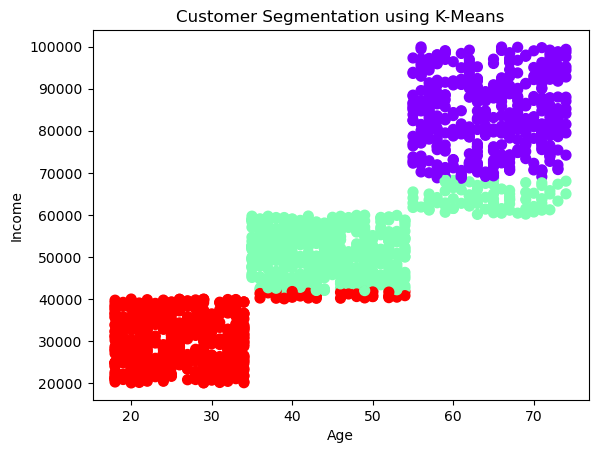

Cluster Centers:
[[6.45496368e+01 8.41474770e+04 6.48910412e+00]
 [4.75442804e+01 5.29800387e+04 4.04612546e+00]
 [2.73449541e+01 3.09261560e+04 2.10642202e+00]]


In [27]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Age', 'Income', 'Purchase Frequency']])


plt.scatter(data['Age'], data['Income'], c=data['Cluster'], cmap='rainbow', s=50)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segmentation using K-Means')
plt.show()

print("Cluster Centers:")
print(kmeans.cluster_centers_)

In [28]:
data

,Age,Income,Purchase Frequency,Segment,clusters,Cluster
0,24,24835,3,Young and Low Income,"KMeans(n_clusters=3, random_state=42)",2
1,32,26042,2,Young and Low Income,"KMeans(n_clusters=3, random_state=42)",2
2,28,34837,3,Young and Low Income,"KMeans(n_clusters=3, random_state=42)",2
3,25,27312,2,Young and Low Income,"KMeans(n_clusters=3, random_state=42)",2
4,24,25320,3,Young and Low Income,"KMeans(n_clusters=3, random_state=42)",2
...,...,...,...,...,...,...
1495,55,78689,6,Older and High Income,"KMeans(n_clusters=3, random_state=42)",0
1496,58,89084,6,Older and High Income,"KMeans(n_clusters=3, random_state=42)",0
1497,65,69280,8,Older and High Income,"KMeans(n_clusters=3, random_state=42)",0
1498,57,62642,8,Older and High Income,"KMeans(n_clusters=3, random_state=42)",1


# DBSCAN

In [44]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Age', 'Income', 'Purchase Frequency']])
dbscan = DBSCAN(eps=0.1, min_samples=5)
data['Cluster'] = dbscan.fit_predict(data_scaled)

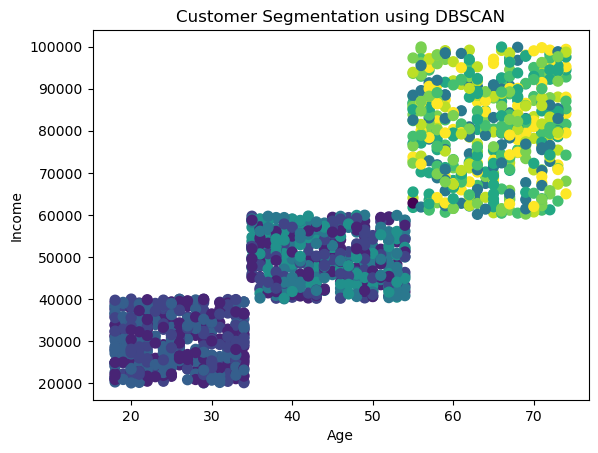

In [45]:
plt.scatter(data['Age'], data['Income'], c=data['Cluster'], cmap='viridis', s=50)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segmentation using DBSCAN')
plt.show()